In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [1]:
https://drive.google.com/file/d/10b2NKUtKzNm1by28AiKh5Dd_NFfARRHy/view?usp=sharingr

In [2]:
df= pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
X= df.iloc[ :, :-1]
y = df.iloc[ :, -1]
X.shape
y.shape


(768,)

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
                                            

# RANDOM FOREST CLASSIFICATION

In [16]:
m1 = RandomForestClassifier(n_estimators = 50,criterion = 'gini',max_depth = 5,min_samples_split = 10)
m1.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50)

# ACCURACY

In [18]:
print('Training Score' , m1.score(X_train,y_train))
print('Test score' , m1.score(X_test,y_test))

Training Score 0.8506944444444444
Test score 0.7708333333333334


In [20]:
ypred_m1= m1.predict(X_test)
ypred_m1

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

# CONFUSION MATRIX (ACCURACY)

In [21]:
cm_m1 = m1.predict(X_test)
cm_m1
print(classification_report(y_test,ypred_m1))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       118
           1       0.78      0.57      0.66        74

    accuracy                           0.77       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



# TREE

In [25]:
from sklearn import tree
#fn = feature name
#cn = class name
fn = X_train.columns
cn = ['0','1']
print(fn)
print(cn)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['0', '1']


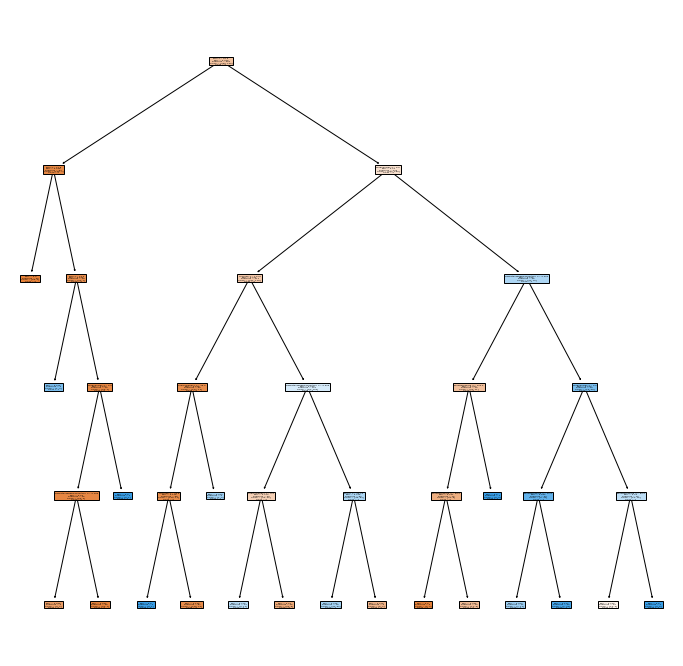

In [27]:
plt.figure(figsize=(12,12))
tree.plot_tree(m1.estimators_[0],feature_names=fn,class_names=cn,filled= True)
plt.show()

# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
m2=m2.fit(X_train,y_train)


In [29]:
print('Training Score' , m2.score(X_train,y_train))
print('Test score' , m2.score(X_test,y_test))

Training Score 0.7725694444444444
Test score 0.71875


In [30]:
ypred_m2=m2.predict(X_test)
print(ypred_m2)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0]


In [31]:
cm_m2 = m2.predict(X_test)
cm_m2
print(classification_report(y_test,ypred_m2))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       118
           1       0.74      0.42      0.53        74

    accuracy                           0.72       192
   macro avg       0.73      0.66      0.67       192
weighted avg       0.72      0.72      0.70       192



# KNN CLASSIFIER

In [37]:
from sklearn.neighbors import KNeighborsClassifier
m3=KNeighborsClassifier(n_neighbors=17)
m3.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=17)

In [38]:
print('Training Score' , m3.score(X_train,y_train))
print('Test score' , m3.score(X_test,y_test))

Training Score 0.796875
Test score 0.6666666666666666


In [48]:
cm_m3 = m3.predict(X_test)
cm_m3
print(classification_report(y_test,ypred_m3))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       118
           1       0.61      0.36      0.46        74

    accuracy                           0.67       192
   macro avg       0.65      0.61      0.61       192
weighted avg       0.66      0.67      0.64       192



In [40]:
ypred_m3= m3.predict(X_test)
print(ypred_m3)

[0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0]


# SVM

In [45]:
from sklearn.svm import SVC
m4 = SVC(kernel ='linear')
m4.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
print('Training Score' , m4.score(X_train,y_train))
print('Test score' , m4.score(X_test,y_test))

Training Score 0.7777777777777778
Test score 0.7708333333333334


In [47]:
ypred_m4=m4.predict(X_test)
ypred_m4

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [49]:
cm_m4 = m4.predict(X_test)
cm_m4
print(classification_report(y_test,ypred_m4))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       118
           1       0.79      0.55      0.65        74

    accuracy                           0.77       192
   macro avg       0.78      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



# LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression
m5 = LogisticRegression(solver='liblinear')
m5.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [54]:
print('Training Score' , m5.score(X_train,y_train))
print('Test score' , m5.score(X_test,y_test))

Training Score 0.7829861111111112
Test score 0.7760416666666666


In [55]:
ypred_m5=m5.predict(X_test)
ypred_m5

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [56]:
cm_m5 = m5.predict(X_test)
cm_m5
print(classification_report(y_test,ypred_m5))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       118
           1       0.82      0.54      0.65        74

    accuracy                           0.78       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.78      0.78      0.76       192



In [57]:
print('Test score' , m1.score(X_test,y_test))
print('Test score' , m2.score(X_test,y_test))
print('Test score' , m3.score(X_test,y_test))
print('Test score' , m4.score(X_test,y_test))
print('Test score' , m5.score(X_test,y_test))

Test score 0.7708333333333334
Test score 0.71875
Test score 0.6666666666666666
Test score 0.7708333333333334
Test score 0.7760416666666666


Logistic Regression is giving out the best predicted result